In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,EstimatedSalary_K,Purchased
0,15624510,Male,19,19000,19,0
1,15810944,Male,35,20000,20,0
2,15668575,Female,26,43000,43,0
3,15603246,Female,27,57000,57,0
4,15804002,Male,19,76000,76,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            400 non-null    int64 
 1   Gender             400 non-null    object
 2   Age                400 non-null    int64 
 3   EstimatedSalary    400 non-null    int64 
 4   EstimatedSalary_K  400 non-null    int64 
 5   Purchased          400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [62]:
df.describe()

,User ID,Age,EstimatedSalary,EstimatedSalary_K,Purchased
count,4.000000e+02,400.000000,400.000000,400.00000,400.000000
mean,1.569154e+07,37.655000,69742.500000,69.74250,0.357500
std,7.165832e+04,10.482877,34096.960282,34.09696,0.479864
min,1.556669e+07,18.000000,15000.000000,15.00000,0.000000
25%,1.562676e+07,29.750000,43000.000000,43.00000,0.000000
50%,1.569434e+07,37.000000,70000.000000,70.00000,0.000000
75%,1.575036e+07,46.000000,88000.000000,88.00000,1.000000
max,1.581524e+07,60.000000,150000.000000,150.00000,1.000000


In [63]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)
df.head()

,User ID,Gender,Age,EstimatedSalary,EstimatedSalary_K,Purchased
0,15624510,1,19,19000,19,0
1,15810944,1,35,20000,20,0
2,15668575,0,26,43000,43,0
3,15603246,0,27,57000,57,0
4,15804002,1,19,76000,76,0


# Build model

In [64]:
df_train=df.iloc[:,[1,2,4,5]]
df_train.head()

,Gender,Age,EstimatedSalary_K,Purchased
0,1,19,19,0
1,1,35,20,0
2,0,26,43,0
3,0,27,57,0
4,1,19,76,0


In [65]:
X=df_train.drop("Purchased",axis=1)
Y=df_train.Purchased

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [68]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [69]:
y_pred=model.predict(X_test)

# Đánh giá model

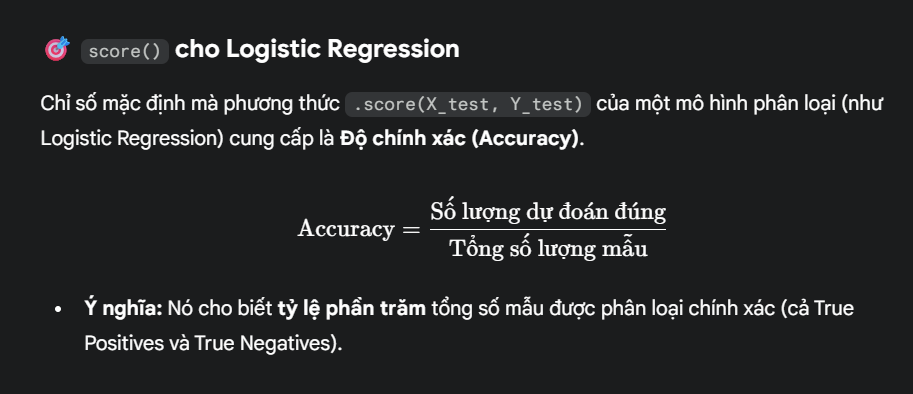

In [70]:
model.score(X_train,Y_train)

0.825

In [71]:
model.score(X_test,Y_test)

0.8833333333333333

In [72]:
from sklearn.metrics import confusion_matrix

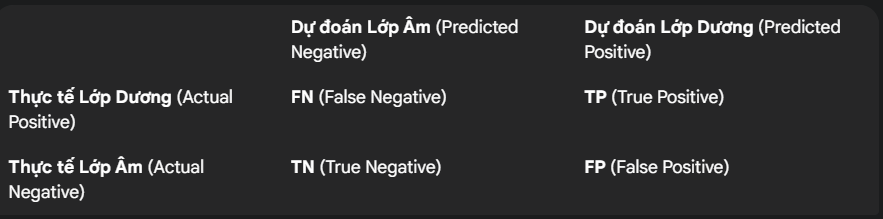

1. True Positive (TP) - Dương tính Đúng:  
    Mô hình dự đoán Dương và giá trị thực tế là Dương.  
    Ví dụ: Mô hình dự đoán một bệnh nhân bị bệnh, và người đó thực sự bị bệnh.  
2. True Negative (TN) - Âm tính Đúng:  
    Mô hình dự đoán Âm và giá trị thực tế là Âm.  
    Ví dụ: Mô hình dự đoán một bệnh nhân không bị bệnh, và người đó thực sự không bị bệnh.  
3. False Positive (FP) - Dương tính Sai (Lỗi Loại I):  
    Mô hình dự đoán Dương, nhưng giá trị thực tế là Âm.  
    Ví dụ: Mô hình dự đoán email là spam, nhưng nó là email quan trọng (báo động giả).  
4. False Negative (FN) - Âm tính Sai (Lỗi Loại II):  
    Mô hình dự đoán Âm, nhưng giá trị thực tế là Dương.  
    Ví dụ: Mô hình dự đoán bệnh nhân không bị bệnh, nhưng người đó thực sự bị bệnh (bỏ sót).

In [73]:
cm=confusion_matrix(Y_test,y_pred)
cm

array([[76,  6],
       [ 8, 30]])

# Xem giá trị xác suất

In [75]:
model.predict_proba(X_test)

array([[0.16646125, 0.83353875],
       [0.18530914, 0.81469086],
       [0.66701062, 0.33298938],
       [0.99854294, 0.00145706],
       [0.5580849 , 0.4419151 ],
       [0.92789609, 0.07210391],
       [0.01514977, 0.98485023],
       [0.92079064, 0.07920936],
       [0.43592312, 0.56407688],
       [0.98879354, 0.01120646],
       [0.75387747, 0.24612253],
       [0.69716726, 0.30283274],
       [0.67508682, 0.32491318],
       [0.65373826, 0.34626174],
       [0.982341  , 0.017659  ],
       [0.99551931, 0.00448069],
       [0.9254089 , 0.0745911 ],
       [0.01293355, 0.98706645],
       [0.52556585, 0.47443415],
       [0.066374  , 0.933626  ],
       [0.10599683, 0.89400317],
       [0.97714095, 0.02285905],
       [0.86862163, 0.13137837],
       [0.56709053, 0.43290947],
       [0.01593774, 0.98406226],
       [0.09420568, 0.90579432],
       [0.52376283, 0.47623717],
       [0.98706111, 0.01293889],
       [0.23248371, 0.76751629],
       [0.92637028, 0.07362972],
       [0.

# Trực quan hóa 1

<Axes: xlabel='Age', ylabel='EstimatedSalary_K'>

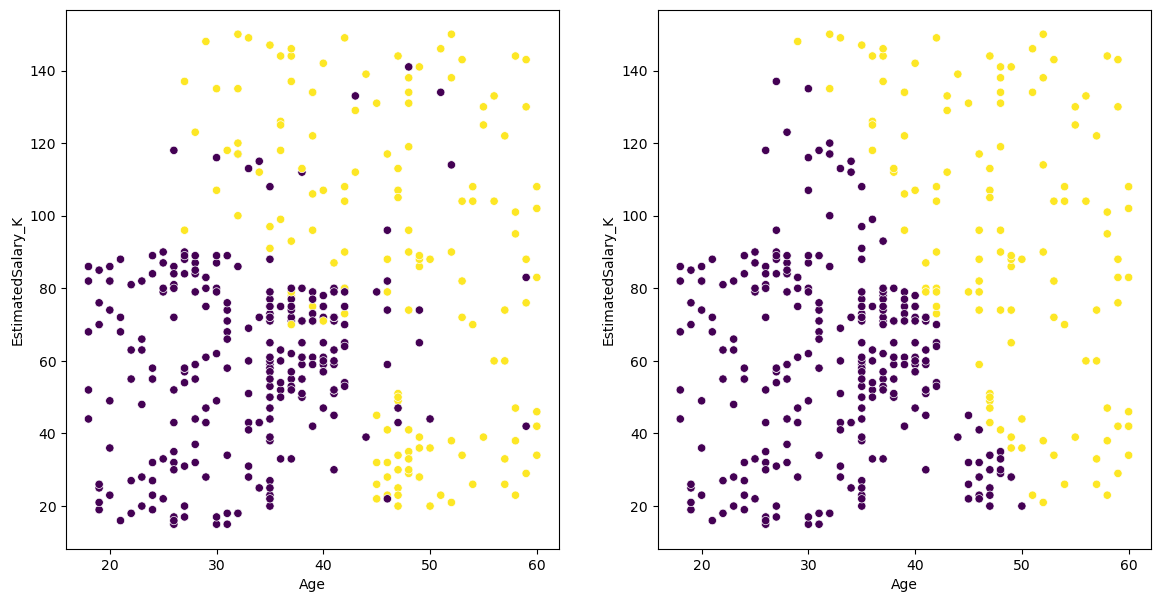

In [80]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.scatterplot(x=X.Age,y=X.EstimatedSalary_K,c=Y)
plt.subplot(1,2,2)
sns.scatterplot(x=X.Age,y=X.EstimatedSalary_K,c=model.predict(X))

nhận xét: những người tuổi càng cao thì thường không mua xe

# Dùng Kbest

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X, Y)
X_selected = selector.transform(X)

In [84]:
# 1. Lấy điểm số và tên đặc trưng
scores = selector.scores_
p_values = selector.pvalues_ # P-value cũng rất quan trọng, càng nhỏ càng tốt
feature_names = X.columns 

# 2. Tạo DataFrame xếp hạng
feature_ranking = pd.DataFrame({
    'Feature': feature_names, 
    'Score': scores,
    'P_Value': p_values
})

# 3. Sắp xếp theo Score từ cao xuống thấp
feature_ranking = feature_ranking.sort_values(by='Score', ascending=False)
feature_ranking.head()

,Feature,Score,P_Value
1,Age,251.742061,2.800234e-44
2,EstimatedSalary_K,60.052579,7.772785e-14
0,Gender,0.719152,3.969320e-01
